# Diamond Price prediction - Kaggle competition 

# Libraries 

In [1]:
import numpy as np
import pandas as pd

from sklearn.svm import SVR
import os
from sys import platform
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, r2_score

from sklearn.decomposition import PCA
from sklearn.preprocessing import MinMaxScaler, LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression
from xgboost import XGBRegressor, XGBRFRegressor
from sklearn.tree import ExtraTreeRegressor, plot_tree
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import GradientBoostingRegressor
from catboost import CatBoostRegressor

import warnings
warnings.filterwarnings('ignore')

In [2]:
#Some configuration for matplotlib and seaborn to look pretty
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
%config Inlinebackend.figure_format= 'retina'
sns.set_context("poster")
sns.set(rc={"figure.figsize": (18.,9.)})
sns.set_style("whitegrid")
SMALL_SIZE = 18
MEDIUM_SIZE = 20
BIGGER_SIZE = 30
plt.rc('font', size=SMALL_SIZE)          # controls default text sizes
plt.rc('axes', titlesize=MEDIUM_SIZE)     # fontsize of the axes title
plt.rc('axes', labelsize=SMALL_SIZE)    # fontsize of the x and y labels
plt.rc('xtick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc('ytick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc('legend', fontsize=SMALL_SIZE)    # legend fontsize
plt.rc('figure', titlesize=BIGGER_SIZE)  # fontsize of the figure title

In [3]:
df_train = pd.read_csv("datasets/train.csv")
df_test = pd.read_csv("datasets/test.csv")

In [4]:
df_train

,id,carat,cut,color,clarity,depth,table,x,y,z,price
0,0,0.30,Premium,D,SI2,62.4,58.0,4.31,4.28,2.68,6.353
1,1,1.01,Ideal,E,VVS2,62.7,56.0,6.42,6.46,4.04,9.183
2,2,0.72,Ideal,F,VS2,61.8,59.0,5.71,5.74,3.54,7.983
3,3,1.08,Very Good,G,SI2,63.2,57.0,6.54,6.50,4.12,8.371
4,4,0.36,Premium,G,VS1,62.3,59.0,4.50,4.55,2.82,6.588
...,...,...,...,...,...,...,...,...,...,...,...
40450,40450,0.42,Premium,D,SI2,62.1,59.0,4.78,4.82,2.98,6.551
40451,40451,0.53,Premium,G,VS2,62.0,58.0,5.21,5.18,3.22,7.382
40452,40452,0.80,Good,G,SI2,62.8,58.0,5.86,5.90,3.69,7.768
40453,40453,1.01,Very Good,F,VS2,61.5,57.0,6.40,6.48,3.96,8.726


In [5]:
df_train.isnull().sum()

id         0
carat      0
cut        0
color      0
clarity    0
depth      0
table      0
x          0
y          0
z          0
price      0
dtype: int64

<AxesSubplot:title={'center':'Correlation Heatmap'}>

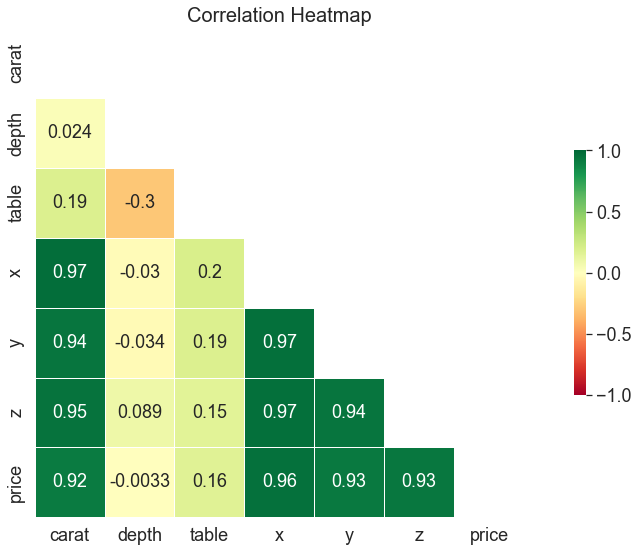

In [6]:
# Your response here. 
#Finding correlations within the df

#Set the variables
corrmat = df_train.drop(columns='id').corr()       
mask = np.triu(np.ones_like(corrmat, dtype=bool)) 
top_corr_features = corrmat.index
plt.title("Correlation Heatmap")

#Plot the heatmap
sns.heatmap(corrmat,  
            mask = mask,
            cmap='RdYlGn',
            square=True, 
            linewidth=0.5, 
            annot = True,
            vmax=1,
            vmin=-1,
            cbar_kws={"shrink": .5})

## Cleaning, processing, feature selection, etc

In [7]:
# Processing is necessary, otherwise we won't be able to fit a model

### We encode the categorical variables 

We check for the imporance of each of the variables in the price. Source: https://www.tiffany.com/engagement/the-tiffany-guide-to-diamonds/color/

In [8]:
#from sklearn import preprocessing

In [9]:
#onehotencoder = preprocessing.OneHotEncoder()

In [10]:
# Create prefixes in columns
#cut = ["cut_" + str(a) for a in list(data.title.unique())]

In [11]:
#color = onehotencoder.fit_transform(dadf_train["color"].values.reshape(-1,1)).toarray()

#### Color 

In [12]:
df_train.color.value_counts()

G    8410
E    7368
F    7182
H    6203
D    5100
I    4070
J    2122
Name: color, dtype: int64

In [13]:
dict_color = {
    "D": 7,
    "E": 6, 
    "F": 5, 
    "G": 4, 
    "H": 3, 
    "I": 2,
    "J": 1
}

In [14]:
df_train.color = df_train.color.map(dict_color)
df_train

,id,carat,cut,color,clarity,depth,table,x,y,z,price
0,0,0.30,Premium,7,SI2,62.4,58.0,4.31,4.28,2.68,6.353
1,1,1.01,Ideal,6,VVS2,62.7,56.0,6.42,6.46,4.04,9.183
2,2,0.72,Ideal,5,VS2,61.8,59.0,5.71,5.74,3.54,7.983
3,3,1.08,Very Good,4,SI2,63.2,57.0,6.54,6.50,4.12,8.371
4,4,0.36,Premium,4,VS1,62.3,59.0,4.50,4.55,2.82,6.588
...,...,...,...,...,...,...,...,...,...,...,...
40450,40450,0.42,Premium,7,SI2,62.1,59.0,4.78,4.82,2.98,6.551
40451,40451,0.53,Premium,4,VS2,62.0,58.0,5.21,5.18,3.22,7.382
40452,40452,0.80,Good,4,SI2,62.8,58.0,5.86,5.90,3.69,7.768
40453,40453,1.01,Very Good,5,VS2,61.5,57.0,6.40,6.48,3.96,8.726


#### Clarity

In [15]:
df_train.clarity.value_counts()

SI1     9779
VS2     9259
SI2     6921
VS1     6079
VVS2    3745
VVS1    2807
IF      1312
I1       553
Name: clarity, dtype: int64

In [16]:
dict_clarity = {
    'IF': 5,
    'VVS1': 4,
    'VVS2': 4,
    'VS1': 3,
    'VS2': 3,
    'SI1': 2,
    'SI2': 2,
    'I1': 1
    }

In [17]:
df_train.clarity = df_train.clarity.map(dict_clarity)
df_train

,id,carat,cut,color,clarity,depth,table,x,y,z,price
0,0,0.30,Premium,7,2,62.4,58.0,4.31,4.28,2.68,6.353
1,1,1.01,Ideal,6,4,62.7,56.0,6.42,6.46,4.04,9.183
2,2,0.72,Ideal,5,3,61.8,59.0,5.71,5.74,3.54,7.983
3,3,1.08,Very Good,4,2,63.2,57.0,6.54,6.50,4.12,8.371
4,4,0.36,Premium,4,3,62.3,59.0,4.50,4.55,2.82,6.588
...,...,...,...,...,...,...,...,...,...,...,...
40450,40450,0.42,Premium,7,2,62.1,59.0,4.78,4.82,2.98,6.551
40451,40451,0.53,Premium,4,3,62.0,58.0,5.21,5.18,3.22,7.382
40452,40452,0.80,Good,4,2,62.8,58.0,5.86,5.90,3.69,7.768
40453,40453,1.01,Very Good,5,3,61.5,57.0,6.40,6.48,3.96,8.726


#### Cut

In [18]:
df_train.cut.value_counts()

Ideal        16230
Premium      10338
Very Good     9003
Good          3682
Fair          1202
Name: cut, dtype: int64

In [19]:
dict_cut = {
    'Ideal': 5,
    'Premium': 4,
    'Very Good': 3,
    'Good': 2,
    'Fair': 1
    }

In [20]:
df_train.cut = df_train.cut.map(dict_cut)
df_train

,id,carat,cut,color,clarity,depth,table,x,y,z,price
0,0,0.30,4,7,2,62.4,58.0,4.31,4.28,2.68,6.353
1,1,1.01,5,6,4,62.7,56.0,6.42,6.46,4.04,9.183
2,2,0.72,5,5,3,61.8,59.0,5.71,5.74,3.54,7.983
3,3,1.08,3,4,2,63.2,57.0,6.54,6.50,4.12,8.371
4,4,0.36,4,4,3,62.3,59.0,4.50,4.55,2.82,6.588
...,...,...,...,...,...,...,...,...,...,...,...
40450,40450,0.42,4,7,2,62.1,59.0,4.78,4.82,2.98,6.551
40451,40451,0.53,4,4,3,62.0,58.0,5.21,5.18,3.22,7.382
40452,40452,0.80,2,4,2,62.8,58.0,5.86,5.90,3.69,7.768
40453,40453,1.01,3,5,3,61.5,57.0,6.40,6.48,3.96,8.726


In [21]:
df_train.dtypes

id           int64
carat      float64
cut          int64
color        int64
clarity      int64
depth      float64
table      float64
x          float64
y          float64
z          float64
price      float64
dtype: object

#### Check correlation

In [22]:
df_train.corr()

,id,carat,cut,color,clarity,depth,table,x,y,z,price
id,1.000000,-0.003045,-0.000372,0.003016,0.005996,-0.000405,0.000783,-0.002447,-0.001936,-0.001273,-0.003194
carat,-0.003045,1.000000,-0.131069,-0.293307,-0.329734,0.023585,0.185478,0.974648,0.944419,0.947469,0.920064
cut,-0.000372,-0.131069,1.000000,0.017590,0.191480,-0.215352,-0.431195,-0.122895,-0.117832,-0.145396,-0.084878
color,0.003016,-0.293307,0.017590,1.000000,-0.010327,-0.047839,-0.028516,-0.272222,-0.263498,-0.268702,-0.157426
clarity,0.005996,-0.329734,0.191480,-0.010327,1.000000,-0.073636,-0.156452,-0.348836,-0.333370,-0.343239,-0.194280
depth,-0.000405,0.023585,-0.215352,-0.047839,-0.073636,1.000000,-0.299203,-0.029867,-0.033960,0.089474,-0.003292
table,0.000783,0.185478,-0.431195,-0.028516,-0.156452,-0.299203,1.000000,0.200374,0.186788,0.153726,0.162804
x,-0.002447,0.974648,-0.122895,-0.272222,-0.348836,-0.029867,0.200374,1.000000,0.967315,0.965496,0.957668
y,-0.001936,0.944419,-0.117832,-0.263498,-0.333370,-0.033960,0.186788,0.967315,1.000000,0.941176,0.928909
z,-0.001273,0.947469,-0.145396,-0.268702,-0.343239,0.089474,0.153726,0.965496,0.941176,1.000000,0.930014


In [23]:
columns_to_drop = ["x", "y", "z"]
df_train.drop(columns_to_drop, inplace=True, axis=1)
df_train

,id,carat,cut,color,clarity,depth,table,price
0,0,0.30,4,7,2,62.4,58.0,6.353
1,1,1.01,5,6,4,62.7,56.0,9.183
2,2,0.72,5,5,3,61.8,59.0,7.983
3,3,1.08,3,4,2,63.2,57.0,8.371
4,4,0.36,4,4,3,62.3,59.0,6.588
...,...,...,...,...,...,...,...,...
40450,40450,0.42,4,7,2,62.1,59.0,6.551
40451,40451,0.53,4,4,3,62.0,58.0,7.382
40452,40452,0.80,2,4,2,62.8,58.0,7.768
40453,40453,1.01,3,5,3,61.5,57.0,8.726


## Train, test split

In [24]:
min_max = MinMaxScaler()
df_train["carat"] = min_max.fit_transform(df_train["carat"].values.reshape(-1, 1))

In [25]:
X = df_train[['carat']]
y = df_train['price']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.35)

In [ ]:
regressor.fit(X_train, y_train)

## Fit

In [27]:
rf = RandomForestRegressor()
xgb = XGBRegressor()
xgbr = XGBRFRegressor()
linreg = LinearRegression()
trees = ExtraTreeRegressor()
knn = KNeighborsRegressor()
gb = GradientBoostingRegressor()
cat = CatBoostRegressor(verbose=0)
regressor = SVR(kernel = 'rbf')


models = [rf, xgb, xgbr, linreg, trees, knn, gb, cat, regressor]

In [28]:
train_preds = pd.DataFrame()

test_preds = pd.DataFrame()

eval_train = pd.DataFrame()

eval_test = pd.DataFrame()

for model in models:
    name = str(model)[:14]
    print(f'\nTraining ..... {name}\n')
    model.fit(X_train, y_train)
    train_pred = model.predict(X_train)
    rmse_train = mean_squared_error(y_train, train_pred, squared=False)
    test_pred = model.predict(X_test)
    rmse_test = mean_squared_error(y_test, test_pred, squared=False)
    
    model.fit(X,y)
    
    
    
    train_preds[f'{name}'] = train_pred
    test_preds[f'{name}'] = test_pred
    
    eval_train[f'{name}'] = rmse_train
    eval_test[f'{name}'] = rmse_test
    
    print(f'RMSE {name} n train: {rmse_train}')
    print(f'RMSE de {name} en test: {rmse_test}')


Training ..... RandomForestRe

RMSE RandomForestRe n train: 0.2493134508652921
RMSE de RandomForestRe en test: 0.25400061641998684

Training ..... XGBRegressor(b

RMSE XGBRegressor(b n train: 0.24929557861498186
RMSE de XGBRegressor(b en test: 0.2539073710156037

Training ..... XGBRFRegressor

RMSE XGBRFRegressor n train: 0.2500777172670421
RMSE de XGBRFRegressor en test: 0.25327765408673375

Training ..... LinearRegressi

RMSE LinearRegressi n train: 0.39793954707585677
RMSE de LinearRegressi en test: 0.3991386507726696

Training ..... ExtraTreeRegre

RMSE ExtraTreeRegre n train: 0.2492828586942188
RMSE de ExtraTreeRegre en test: 0.25406568708386595

Training ..... KNeighborsRegr

RMSE KNeighborsRegr n train: 0.2659757780913137
RMSE de KNeighborsRegr en test: 0.26977638308955326

Training ..... GradientBoosti

RMSE GradientBoosti n train: 0.24985616888225642
RMSE de GradientBoosti en test: 0.25306831320814616

Training ..... <catboost.core

RMSE <catboost.core n train: 0.249430490150

##  Predict on the `test.csv`
 

In [ ]:
y_pred = regressor.predict(df_test_cleaned)
y_pred

##  DF with two columns

In [ ]:
df_test_cleaned['price'] = y_pred # Adding the predicted price
df_for_submission = df_test_cleaned[["id", "price"]] # Modifying for subnmission

##  Export (index=False) 

In [ ]:
df_for_submission.to_csv("my_submission.csv", index=False)